In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
data = pd.read_csv('delivery_time.csv')

In [11]:
print(data.head())


   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


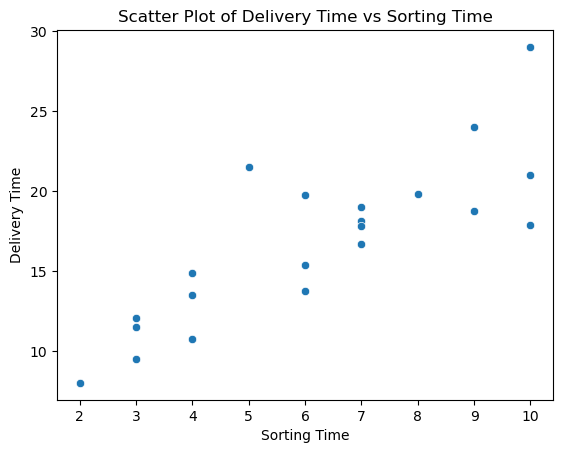

In [12]:
sns.scatterplot(x=data['Sorting Time'], y=data['Delivery Time'])
plt.title('Scatter Plot of Delivery Time vs Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [14]:
X = data[['Sorting Time']]
y = data['Delivery Time']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [17]:
model_initial = LinearRegression()
model_initial.fit(X_train, y_train)
y_pred_initial = model_initial.predict(X_test)
rmse_initial = calculate_rmse(y_test, y_pred_initial)

In [18]:
print("Initial Linear Regression Model RMSE:", rmse_initial)

Initial Linear Regression Model RMSE: 3.7478979383962705


In [19]:
transformations = ['log', 'square', 'sqrt']
for transformation in transformations:
    X_transformed_train = getattr(np, transformation)(X_train)
    X_transformed_test = getattr(np, transformation)(X_test)

In [21]:
model_transformed = LinearRegression()
model_transformed.fit(X_transformed_train, y_train)
y_pred_transformed = model_transformed.predict(X_transformed_test)
rmse_transformed = calculate_rmse(y_test, y_pred_transformed)

In [22]:
print(f"{transformation.capitalize()} Transformed Linear Regression Model RMSE:", rmse_transformed)

Sqrt Transformed Linear Regression Model RMSE: 3.1403397617192867
